In [1]:
import pandas as pd
import numpy as np

In [5]:
import os
import glob

In [30]:
from bs4 import BeautifulSoup

In [91]:
import seaborn as sns

In [147]:
from collections import Counter

# Objective 1: Convert HTMLs into searchable big strings
1. Make efficient read in process
2. Delete all html tags
3. delete all duplicated spaces

## 1.1 Make efficient Read in Process
### 1.1.a make list of paths

In [156]:
#ls data/nc_training_filings/

In [21]:
# initiate empty list of file names
training_filings_list = []

In [157]:
#import os
#import glob
# append a path for each html file in the directory
for root, dirs, files in os.walk('data/nc_training_filings/'):
    training_filings_list += glob.glob(os.path.join(root, '*.html'))

training_filings_list[0:10]

['data/nc_training_filings/0001193125-17-248016.html',
 'data/nc_training_filings/0000318154-18-000004.html',
 'data/nc_training_filings/0000769397-18-000011.html',
 'data/nc_training_filings/0001193125-17-217396.html',
 'data/nc_training_filings/0001037038-17-000004.html',
 'data/nc_training_filings/0001104659-18-013503.html',
 'data/nc_training_filings/0000815556-18-000010.html',
 'data/nc_training_filings/0000109380-18-000102.html',
 'data/nc_training_filings/0000010795-17-000021.html',
 'data/nc_training_filings/0000086521-18-000019.html']

In [24]:
len(training_filings_list)

435

This is great, 435 is the length of the unique accession numbers in the csv! 😃 

### 1.1.b read in an html

In [25]:
training_filings_list[0]

'data/nc_training_filings/0001193125-17-248016.html'

In [26]:
with open(training_filings_list[0]) as file:
    file_html = file.read()

In [27]:
type(file_html)

str

In [161]:
file_html[0:4000]

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml">\n<head>\n<meta name="generator" content=\n"HTML Tidy for HTML5 (experimental) for Linux https://github.com/w3c/tidy-html5/tree/68a9e74" />\n<title>10-K</title>\n<title>EX-21.1</title>\n<title>EX-23.1</title>\n<title>EX-31.1</title>\n<title>EX-31.2</title>\n<title>EX-32.1</title>\n\n<style type="text/css">\n/*<![CDATA[*/\n body {\n  background-color: white;\n }\n p.c92 {font-family: Times New Roman; font-size: 80%; margin-bottom: 1px; margin-left: 1.00em; margin-top: 0px; text-indent: -1.00em}\n p.c91 {font-family: Times New Roman; font-size: 70%; text-align: left}\n p.c90 {font-family: Times New Roman; font-size: 80%; margin-bottom: 0px; margin-left: 1.00em; margin-top: 0px; text-indent: -1.00em}\n p.c89 {font-family: Times New Roman; font-size: 80%; margin-bottom: 1px; margin-top: 0px}\n p.c88 {font-family: Times New Roman; font-size: 80%; margin-bottom: 1px; margin-top: 0px; text-align: center}\n p.c87 {font-family: Times 

### 1.1.b read in all htmls
I'll get back to this later, this should be a simple enough loop.

## 1.2 Filter out HTML and CSS
i.e. (extract the text from the html)

In [ ]:
# beautiful has a get text function that is awesome

# ginsim can strip new lines and stuff

# beautiful soup removeattrs
    # should get rid of the style sheet crap

# .find(HEAD) extract
    # a pandas method

In [31]:
# Attempt preprocessing with beautiful soup
parsed_html = BeautifulSoup(file_html)

/Users/paulomartinez/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/paulomartinez/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [36]:
type(parsed_html)

bs4.BeautifulSoup

In [37]:
type(parsed_html.body)

bs4.element.Tag

In [38]:
type(parsed_html.body.text)

str

In [163]:
print(parsed_html.body.text[0:500])


Table of Contents
UNITED STATES
SECURITIES AND EXCHANGE COMMISSION
Washington, D.C. 20549

FORM 10-K

[X] ANNUAL REPORT PURSUANT TO SECTION 13 OR 15(d) OF
THE SECURITIES EXCHANGE ACT OF 1934

For the fiscal year ended June 30, 2017

Commission file number: 001-15317

RESMED INC.
(Exact name of registrant as specified in its charter)

DELAWARE
(State or other jurisdiction of incorporation or organization)

98-0152841
(IRS Employer Identification No.)

9001 Spectrum Center Blvd.
San Diego, CA 921


#### ⚠️ Caution! I may be ommitting important data by only working with the body
- I need to learn more about html structure, and whether or not there can be any imortant information in footnotes or headers, or tables or whatnot

## 1.3 Delete all duplicate spaces
- lets hold off on this until it prooves necessary

# Objective 2: identify and return relevant paragraphs
1. select relevant key words from csv
2. make a process to identify the location of these key terms in the big string
3. return the key term + max(len(relevant paragraph))/2 "buffer margin"
4. Check to see if I have accurately identified relevant paragraphs

## 2.1 select relevant training text 
- group them by the corresponding data_key_friendly_name

In [70]:
#read in the csv
share_rprchs_prgrph_df = pd.read_csv('data/share_repurchase_paragraphs.csv')

In [71]:
share_rprchs_prgrph_df.head(2)

,ticker,accession_number,data_key_friendly_name,text,data_value,reported_data_value,reported_units,paragraph_text
0,A,0001090872-17-000018,Share Repurchase Authorization Date,"May 28, 2015",20150528,20200000.00,ones,"On May 28, 2015 we announced that our board ..."
1,A,0001090872-17-000018,Share Repurchase Authorization,The 2015 share repurchase program authorizes t...,1140000000,1.14,billions,"On May 28, 2015 we announced that our board ..."


In [72]:
share_rprchs_prgrph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 8 columns):
ticker                    1781 non-null object
accession_number          1781 non-null object
data_key_friendly_name    1781 non-null object
text                      1781 non-null object
data_value                1781 non-null int64
reported_data_value       1781 non-null float64
reported_units            1781 non-null object
paragraph_text            1781 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 111.4+ KB


In [73]:
share_rprchs_prgrph_df.data_key_friendly_name.value_counts()

Share Repurchase Authorization Date    401
Share Repurchase Authorization         369
Amount Spent on Share Repurchases      329
Share Repurchase Count                 286
Share Repurchase Intention             227
Unknown Share Repurchase Data          122
Share Repurchase Utilization            47
Name: data_key_friendly_name, dtype: int64

**relevant candidates**
- Share Repurchase Authorization
- Share Repurchase Intention
- Unknown Share Repurchase Data

**irrelevant candidates**
- Share Repurchase Authorization Date 
- Amount Spent on Share Repurchases
- Share Repurchases Count

### what is 'Share Repurchase Utilization' and is it relevant?
- check it out

In [74]:
share_rprchs_prgrph_df[share_rprchs_prgrph_df.data_key_friendly_name =='Share Repurchase Utilization']

,ticker,accession_number,data_key_friendly_name,text,data_value,reported_data_value,reported_units,paragraph_text
16,AAPL,0000320193-17-000070,Share Repurchase Utilization,utilized,166000000000,166.000,billions,"Share Repurchase Program In May 2017, the Co..."
37,ABT,0001047469-18-000856,Share Repurchase Utilization,repurchased,1700000000,1.700,billions,"In September 2014, the board of directors auth..."
41,ABT,0001047469-18-000856,Share Repurchase Utilization,repurchased,408000000,408.000,millions,"In September 2014, the board of directors auth..."
42,ABT,0001047469-18-000856,Share Repurchase Utilization,repurchased,512000000,512.000,millions,"In September 2014, the board of directors auth..."
49,ADI,0000006281-17-000144,Share Repurchase Utilization,the Company had repurchased a total of approxi...,5400000000,5.400,billions,Common Stock Repurchases The Company's commo...
70,AES,0000874761-18-000014,Share Repurchase Utilization,for a total cost of,1900000000,1.900,billions,Stock Repurchase Program - No shares were repu...
78,AGN,0001564590-18-002345,Share Repurchase Utilization,"As of December 31, 2017, the Company has repur...",450000000,450.000,millions,"On September 25, 2017, the Company's Board of ..."
114,ALK,0000766421-18-000015,Share Repurchase Utilization,repurchased,388000000,388.000,millions,"Common Stock Repurchase In May 2014, the Boa..."
159,AMT,0001053507-18-000006,Share Repurchase Utilization,aggregate,1200000000,1.200,billions,"On February 15, 2018, the Company paid the fin..."
235,AZO,0001193125-17-319357,Share Repurchase Utilization,aggregate cost of,17826000000,17.826,billions,"During 1998, the Company announced a program p..."


In [76]:
for txt, partxt in zip(share_rprchs_prgrph_df[share_rprchs_prgrph_df.data_key_friendly_name =='Share Repurchase Utilization'].text, share_rprchs_prgrph_df[share_rprchs_prgrph_df.data_key_friendly_name =='Share Repurchase Utilization'].paragraph_text):
    print('text:-------', txt,'--------')
    print('')
    print('partxt:=======================')
    print(partxt)
    print('==============================')
    print('')


text:------- utilized --------

partxt:=======================
Share Repurchase Program   In May 2017, the Company's Board of Directors increased the share repurchase authorization from $175  billion   to $210 billion of the Company's  common stock, of which $166 billion  had been utilized as of September  30,   2017. The Company's share repurchase program does not  obligate it to acquire any specific number of  shares

text:------- repurchased --------

partxt:=======================
In September 2014, the board of directors authorized the repurchase of up to $3.0 billion of Abbott's  common   shares from time to  time. The 2014 authorization  was in addition  to the $512 million  unused portion of  a   previous program announced in June 2013.  In 2016, Abbott repurchased 10.4 million  shares at a cost of  $408   million under the program authorized in  2014. In 2015, Abbott repurchased 11.3  million shares at a cost  of   $512 million under the unused  portion of the 2013  authorizat

#### ⚠️ 😐  Looks like there are duplicates in the supposedly 'clean' data

In [88]:
# add a column of count that row appears in the df
#share_rprchs_prgrph_df.groupby(share_rprchs_prgrph_df.columns.tolist()).size().reset_index().rename(columns={0:'cnt'})

In [89]:
# count duplicate rows in the data frame
#print('1763 rows have a count of: 1 (i.e. they are unique rows)')
#print('9 rows have a count of: 2 (i.e. they are non-unique rows)')
#print('----------')
#share_rprchs_prgrph_df.groupby(share_rprchs_prgrph_df.columns.tolist()).size().reset_index().rename(columns={0:'cnt'}).cnt.value_counts()


In [68]:
# add that column to the df
#share_rprchs_prgrph_df = share_rprchs_prgrph_df.groupby(share_rprchs_prgrph_df.columns.tolist()).size().reset_index().rename(columns={0:'col_count'})

In [90]:
# display the duplicate rows
#share_rprchs_prgrph_df[share_rprchs_prgrph_df.col_count > 1]

#### Simpler method to identify duplicated rows

In [80]:
# count the number of duplicate rows
share_rprchs_prgrph_df.duplicated().sum()

9

In [82]:
# display the rows that are duplicates 
share_rprchs_prgrph_df[share_rprchs_prgrph_df.duplicated()]

,ticker,accession_number,data_key_friendly_name,text,data_value,reported_data_value,reported_units,paragraph_text
111,ALGN,0001097149-18-000010,Amount Spent on Share Repurchases,repurchased,50000000,50.0,millions,Stock Repurchases: April 2016 Repurchase Progr...
229,AYI,0001144215-17-000106,Unknown Share Repurchase Data,repurchase,2000000,2.0,millions,Issuer Purchases of Equity Securities During...
255,BAX,0001564590-18-002954,Share Repurchase Authorization,The board of directors increased this authorit...,1500000000,1.5,billions,"As authorized by the board of directors, the c..."
680,FLIR,0000354908-18-000014,Unknown Share Repurchase Data,the Company's Board of Directors authorized th...,15000000,15.0,millions,"On February 5, 2015, the Company's Board of Di..."
730,GPC,0000040987-18-000002,Unknown Share Repurchase Data,the Board of Directors announced that it had a...,15000000,15.0,millions,"On November 17, 2008, and August 21, 2017, the..."
825,HRL,0001104659-17-074227,Unknown Share Repurchase Data,the Company's Board of Directors authorized th...,10000000,10.0,millions,"Share Repurchases: On January 29, 2013, the Co..."
1004,LEG,0000058492-18-000004,Unknown Share Repurchase Data,the Company was authorized by the Board of Dir...,10000000,10.0,millions,"On August 4, 2004, the Board authorized manage..."
1361,PX,0000884905-18-000014,Share Repurchase Authorization,the Company's board of directors approved the ...,1500000000,1.5,billions,"On January 28, 2014, the Company's board of di..."
1442,SCHW,0000316709-18-000009,Share Repurchase Authorization,two authorizations under this program by CSC's...,500000000,500.0,millions,THE CHARLES SCHWAB CORPORATION Issuer Purcha...


In [85]:
# display rows that are duplicates, preceded by their 'first instance'
share_rprchs_prgrph_df[share_rprchs_prgrph_df.duplicated(keep=False)]

,ticker,accession_number,data_key_friendly_name,text,data_value,reported_data_value,reported_units,paragraph_text
107,ALGN,0001097149-18-000010,Amount Spent on Share Repurchases,repurchased,50000000,50.0,millions,Stock Repurchases: April 2016 Repurchase Progr...
111,ALGN,0001097149-18-000010,Amount Spent on Share Repurchases,repurchased,50000000,50.0,millions,Stock Repurchases: April 2016 Repurchase Progr...
228,AYI,0001144215-17-000106,Unknown Share Repurchase Data,repurchase,2000000,2.0,millions,Issuer Purchases of Equity Securities During...
229,AYI,0001144215-17-000106,Unknown Share Repurchase Data,repurchase,2000000,2.0,millions,Issuer Purchases of Equity Securities During...
254,BAX,0001564590-18-002954,Share Repurchase Authorization,The board of directors increased this authorit...,1500000000,1.5,billions,"As authorized by the board of directors, the c..."
255,BAX,0001564590-18-002954,Share Repurchase Authorization,The board of directors increased this authorit...,1500000000,1.5,billions,"As authorized by the board of directors, the c..."
679,FLIR,0000354908-18-000014,Unknown Share Repurchase Data,the Company's Board of Directors authorized th...,15000000,15.0,millions,"On February 5, 2015, the Company's Board of Di..."
680,FLIR,0000354908-18-000014,Unknown Share Repurchase Data,the Company's Board of Directors authorized th...,15000000,15.0,millions,"On February 5, 2015, the Company's Board of Di..."
729,GPC,0000040987-18-000002,Unknown Share Repurchase Data,the Board of Directors announced that it had a...,15000000,15.0,millions,"On November 17, 2008, and August 21, 2017, the..."
730,GPC,0000040987-18-000002,Unknown Share Repurchase Data,the Board of Directors announced that it had a...,15000000,15.0,millions,"On November 17, 2008, and August 21, 2017, the..."


In [83]:
dfa = share_rprchs_prgrph_df[share_rprchs_prgrph_df.duplicated(keep=False)]
dfa

,ticker,accession_number,data_key_friendly_name,text,data_value,reported_data_value,reported_units,paragraph_text
107,ALGN,0001097149-18-000010,Amount Spent on Share Repurchases,repurchased,50000000,50.0,millions,Stock Repurchases: April 2016 Repurchase Progr...
111,ALGN,0001097149-18-000010,Amount Spent on Share Repurchases,repurchased,50000000,50.0,millions,Stock Repurchases: April 2016 Repurchase Progr...
228,AYI,0001144215-17-000106,Unknown Share Repurchase Data,repurchase,2000000,2.0,millions,Issuer Purchases of Equity Securities During...
229,AYI,0001144215-17-000106,Unknown Share Repurchase Data,repurchase,2000000,2.0,millions,Issuer Purchases of Equity Securities During...
254,BAX,0001564590-18-002954,Share Repurchase Authorization,The board of directors increased this authorit...,1500000000,1.5,billions,"As authorized by the board of directors, the c..."
255,BAX,0001564590-18-002954,Share Repurchase Authorization,The board of directors increased this authorit...,1500000000,1.5,billions,"As authorized by the board of directors, the c..."
679,FLIR,0000354908-18-000014,Unknown Share Repurchase Data,the Company's Board of Directors authorized th...,15000000,15.0,millions,"On February 5, 2015, the Company's Board of Di..."
680,FLIR,0000354908-18-000014,Unknown Share Repurchase Data,the Company's Board of Directors authorized th...,15000000,15.0,millions,"On February 5, 2015, the Company's Board of Di..."
729,GPC,0000040987-18-000002,Unknown Share Repurchase Data,the Board of Directors announced that it had a...,15000000,15.0,millions,"On November 17, 2008, and August 21, 2017, the..."
730,GPC,0000040987-18-000002,Unknown Share Repurchase Data,the Board of Directors announced that it had a...,15000000,15.0,millions,"On November 17, 2008, and August 21, 2017, the..."


In [84]:
# isolate list of touples of duplicated row indices
dfb = dfa.groupby(dfa.columns.tolist()).apply(lambda x: tuple(x.index)).tolist()
print (dfb)

[(107, 111), (228, 229), (254, 255), (679, 680), (729, 730), (824, 825), (1003, 1004), (1357, 1361), (1441, 1442)]


[(1, 6), (2, 4), (3, 5)]

### drop the duplicated rows

In [119]:
# get the indices of the duplicate rows
dups = list(share_rprchs_prgrph_df[share_rprchs_prgrph_df.duplicated()].index)
dups

[111, 229, 255, 680, 730, 825, 1004, 1361, 1442]

In [127]:
# create a one-line list comprehension boolean series for subsetting the df and test if it worked
share_rprchs_prgrph_df[[i not in dups for i in share_rprchs_prgrph_df.index]].duplicated().sum()

0

In [128]:
# drop the duplicate rows (there was probably a more elegant way to do this... )
share_rprchs_prgrph_df = share_rprchs_prgrph_df[[i not in dups for i in share_rprchs_prgrph_df.index]]
share_rprchs_prgrph_df.reset_index(inplace=True)
share_rprchs_prgrph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 9 columns):
index                     1772 non-null int64
ticker                    1772 non-null object
accession_number          1772 non-null object
data_key_friendly_name    1772 non-null object
text                      1772 non-null object
data_value                1772 non-null int64
reported_data_value       1772 non-null float64
reported_units            1772 non-null object
paragraph_text            1772 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 124.7+ KB


   cola  colb
0   0.0   1.0
1   2.0   2.0
2   3.0   3.0
3   4.0   NaN
4   5.0   4.0
5   NaN   5.0
6   2.0   2.0


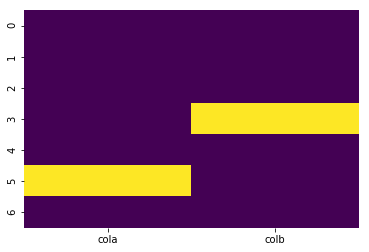

In [105]:
# Gil's snippet on visualizing null values
df = pd.DataFrame({'cola': [0,2,3,4,5, None, 2],'colb': [1,2,3, None,4,5, 2]})
print(df)
sns.heatmap(df.isnull(), yticklabels=True, cbar=False, cmap='viridis')

### Looks like Share repurchase utilization is relevant so add it to the list of relevant candidates

In [130]:
share_rprchs_prgrph_df.data_key_friendly_name.value_counts()

Share Repurchase Authorization Date    401
Share Repurchase Authorization         366
Amount Spent on Share Repurchases      328
Share Repurchase Count                 286
Share Repurchase Intention             227
Unknown Share Repurchase Data          117
Share Repurchase Utilization            47
Name: data_key_friendly_name, dtype: int64

**relevant candidates**
- Share Repurchase Authorization
- Share Repurchase Intention
- Unknown Share Repurchase Data
- Share Repurchase Utilization

**irrelevant candidates**
- Share Repurchase Authorization Date 
- Amount Spent on Share Repurchases
- Share Repurchases Count

In [131]:
relevant_dkfns = ['Share Repurchase Authorization', 'Share Repurchase Intention', 
                  'Unknown Share Repurchase Data', 'Share Repurchase Utilization']

## ⚠️ Jarrod discovered that some rows have text that is not in that rows paragraph

In [139]:
'word' in 'this is a long string with word in the middle'

True

In [144]:
txt_not_in_par_count = 0
untrue_dkfns = []
for i in share_rprchs_prgrph_df.index:
    #print(i)
    #print(share_rprchs_prgrph_df.text[i])
    #print(share_rprchs_prgrph_df.paragraph_text[i])
    if not(share_rprchs_prgrph_df.text[i] in share_rprchs_prgrph_df.paragraph_text[i]):
        #print('found row with text not in paragraph at index ', i)
        txt_not_in_par_count +=1
        untrue_dkfns.append(share_rprchs_prgrph_df.data_key_friendly_name[i])
print('number of texts not in their row paragraph ', txt_not_in_par_count)
print('that is a percentage of ', 100*txt_not_in_par_count/len(share_rprchs_prgrph_df.index), '%')

number of texts not in their row paragraph  434
that is a percentage of  24.492099322799096 %


## lets check if any dkfs are more 'true' than others

In [155]:
untrue_dkfns_count = Counter(untrue_dkfns)
untrue_dkfns_count

Counter({'Share Repurchase Authorization': 161,
         'Amount Spent on Share Repurchases': 22,
         'Share Repurchase Authorization Date': 59,
         'Share Repurchase Utilization': 12,
         'Unknown Share Repurchase Data': 55,
         'Share Repurchase Intention': 114,
         'Share Repurchase Count': 11})

In [154]:
share_rprchs_prgrph_df.data_key_friendly_name.value_counts()

Share Repurchase Authorization Date    401
Share Repurchase Authorization         366
Amount Spent on Share Repurchases      328
Share Repurchase Count                 286
Share Repurchase Intention             227
Unknown Share Repurchase Data          117
Share Repurchase Utilization            47
Name: data_key_friendly_name, dtype: int64

In [ ]:
for untrue_count, val_count in 